In [4]:
#Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
#read a csv, pandas make it a data frame
log = pd.read_csv('keys.csv')

In [7]:
# Twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key.1'][0]
accessToken = log['key.2'][0]
accessTokenSecret = log['key.3'][0]

In [8]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)

# Set the access token
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the authentication information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [15]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "BillGates", count = "100", lang = "en", tweet_mode = "extended")

# Last 5 tweets
print('Last 5 posts: \n')
i = 1

for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + ' \n')
    i += 1


Last 5 posts: 

1) Bill Foege and Viktor Zdanov are phenomenal examples of what it means to harness science for global health. A well-deserved honor. https://t.co/44jYPCZCbt 

2) Here are five books that I’d recommend as we wrap up 2020. I hope you find something that helps you—or the book lover in your life—finish the year on a good note. https://t.co/9N0hL2xvTQ 

3) Are we actually making progress on climate change? Can we really prevent a climate disaster? In this week’s podcast, Rashida and I take on perhaps our biggest question yet with Pulitzer Prize-winning author @ElizKolbert. https://t.co/ugS31mpJin 

4) This new quiz from @Gapminder is a clever way to fight misconceptions and “upgrade your worldview” about the incredible progress the world has made toward the Sustainable Development Goals to end poverty, fight inequality, and stop climate change: https://t.co/Qo0oaxv1tb 

5) Rashida Jones and I talked to Yuval Noah Harari about COVID conspiracy theories, the role social media

In [20]:
# Create a data frame with a column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns = ['Tweets'])

# First 5 rows of data
df.tail()

,Tweets
95,RT @melindagates: Decision-makers can take ste...
96,"Globally, a lack of medical oxygen–needed to t..."
97,This hero is playing a critical role in Kenya’...
98,RT @MichelleObama: Here's what #Juneteenth mea...
99,RT @NavigatingNikki: “It’s that clarity of lan...


In [23]:
# Clean the text

# Function to clean the tweets
def cleanTxt(text):
    # regular expressions to get the letters after the @ and remove them
    # r = raw string
    text = re.sub(r'@[A-Za-z0-9]+:?', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    return text

df['Tweets']= df['Tweets'].apply(cleanTxt)

# Show the cleaned Text
df

,Tweets
0,Bill Foege and Viktor Zdanov are phenomenal ex...
1,Here are five books that I’d recommend as we w...
2,Are we actually making progress on climate cha...
3,This new quiz from is a clever way to fight m...
4,Rashida Jones and I talked to Yuval Noah Harar...
...,...
95,Decision-makers can take steps right now to m...
96,"Globally, a lack of medical oxygen–needed to t..."
97,This hero is playing a critical role in Kenya’...
98,Here's what Juneteenth means to me:


In [24]:
# Function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Store data in the df
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new data frame with the new columns
df

,Tweets,Subjectivity,Polarity
0,Bill Foege and Viktor Zdanov are phenomenal ex...,0.250000,0.250000
1,Here are five books that I’d recommend as we w...,0.600000,0.700000
2,Are we actually making progress on climate cha...,0.150000,0.100000
3,This new quiz from is a clever way to fight m...,0.729293,0.401010
4,Rashida Jones and I talked to Yuval Noah Harar...,0.358333,0.191667
...,...,...,...
95,Decision-makers can take steps right now to m...,0.641534,0.428571
96,"Globally, a lack of medical oxygen–needed to t...",0.125000,-0.041667
97,This hero is playing a critical role in Kenya’...,0.540000,0.020000
98,Here's what Juneteenth means to me:,0.000000,0.000000


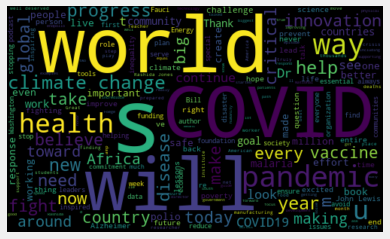

In [25]:
# plot Word Cloud
allWords = ' '.join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [26]:
# Create a function to compute the negative , neutral and positive analysis 
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Bill Foege and Viktor Zdanov are phenomenal ex...,0.250000,0.250000,Positive
1,Here are five books that I’d recommend as we w...,0.600000,0.700000,Positive
2,Are we actually making progress on climate cha...,0.150000,0.100000,Positive
3,This new quiz from is a clever way to fight m...,0.729293,0.401010,Positive
4,Rashida Jones and I talked to Yuval Noah Harar...,0.358333,0.191667,Positive
...,...,...,...,...
95,Decision-makers can take steps right now to m...,0.641534,0.428571,Positive
96,"Globally, a lack of medical oxygen–needed to t...",0.125000,-0.041667,Negative
97,This hero is playing a critical role in Kenya’...,0.540000,0.020000,Positive
98,Here's what Juneteenth means to me:,0.000000,0.000000,Neutral


In [42]:
# Print all of the positive tweets
j = 1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+ sortedDF['Tweets'][i])
        print()
        j += 1

1) Bill Foege and Viktor Zdanov are phenomenal examples of what it means to harness science for global health. A well-deserved honor. 

2) Here are five books that I’d recommend as we wrap up 2020. I hope you find something that helps you—or the book lover in your life—finish the year on a good note. 

3) Are we actually making progress on climate change? Can we really prevent a climate disaster? In this week’s podcast, Rashida and I take on perhaps our biggest question yet with Pulitzer Prize-winning author . 

4) This new quiz from  is a clever way to fight misconceptions and “upgrade your worldview” about the incredible progress the world has made toward the Sustainable Development Goals to end poverty, fight inequality, and stop climate change: 

5) Rashida Jones and I talked to Yuval Noah Harari about COVID conspiracy theories, the role social media plays in spreading misinformation, and the one lie I choose to believe even though I know it’s not always true:  

6) I believe we ca

In [43]:
# Print all of the negative tweets
j = 1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+ sortedDF['Tweets'][i])
        print()
        j += 1

1) We need to revolutionize the world’s physical economy—and that will take, among other things, a dramatic infusion of ingenuity, funding, and focus from the federal government.

2) Nearly forty million people have Alzheimer’s or dementia today. We have no way to stop or even slow the disease at this point, but I’m hopeful the new Alzheimer’s Disease Data Initiative () will speed up progress. 

3)  Even with his busy schedule, Dr. Fauci took the time to sit down with me (AGAIN) and talk about what we’ve gotten right…

4)  What do COVID-19 and malaria have to do with each other?  

When COVID-19 struck, it disrupted the entire global healt…

5) To prevent the worst effects of climate change, we need innovation across all sectors—especially in the hardest to decarbonize sectors—to get us on a viable path to net-zero emissions. 

6) Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be disa

Text(0, 0.5, 'Subjectivity')

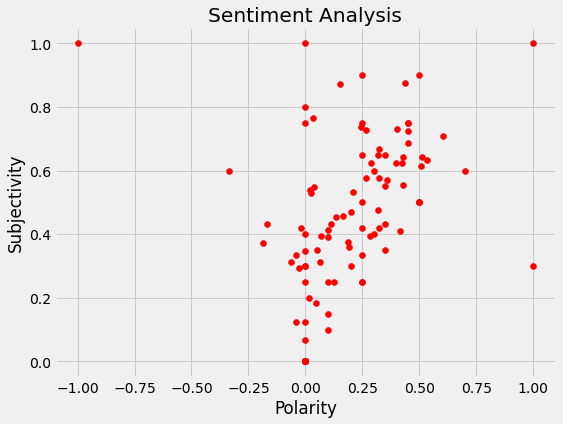

In [36]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Red')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [39]:
# Percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

71.0

In [40]:
# Percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

9.0

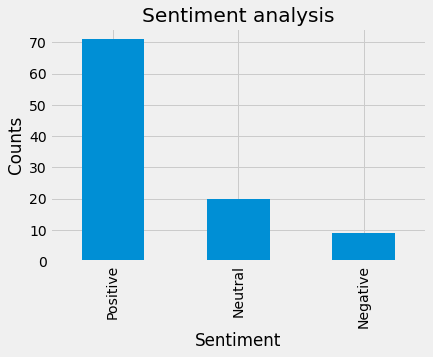

In [41]:
# Value counts
df['Analysis'].value_counts()

# plot and visualize the counts
plt.title('Sentiment analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()
